In [32]:
# NOTE importing data

import yfinance as yf
import os
import json
import pandas as pd

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

In [34]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055536,0.063703,0.055536,0.060980,1031788800,0.0,0.0
1986-03-14,0.060980,0.064247,0.060980,0.063158,308160000,0.0,0.0
1986-03-17,0.063158,0.064792,0.063158,0.064247,133171200,0.0,0.0
1986-03-18,0.064247,0.064792,0.062069,0.062613,67766400,0.0,0.0
1986-03-19,0.062613,0.063158,0.060980,0.061524,47894400,0.0,0.0


<AxesSubplot: xlabel='Date'>

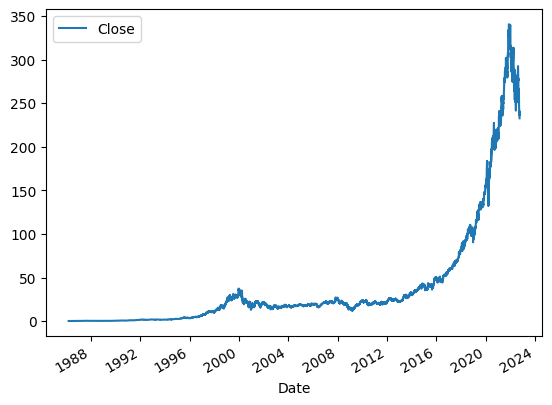

In [35]:
# NOTE Visualize microsoft stock prices
msft_hist.plot.line(y="Close", use_index=True)

In [38]:
# NOTE Ensure we know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# NOTE Setup our target.  This identifies if the price went up or down
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [39]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13,0.060980,NaN
1986-03-14,0.063158,1.0
1986-03-17,0.064247,1.0
1986-03-18,0.062613,0.0
1986-03-19,0.061524,0.0


In [41]:
msft_prev = msft_hist.copy()

In [42]:
msft_prev = msft_prev.shift(1)

In [43]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055536,0.063703,0.055536,0.060980,1.031789e+09,0.0,0.0
1986-03-17,0.060980,0.064247,0.060980,0.063158,3.081600e+08,0.0,0.0
1986-03-18,0.063158,0.064792,0.063158,0.064247,1.331712e+08,0.0,0.0
1986-03-19,0.064247,0.064792,0.062069,0.062613,6.776640e+07,0.0,0.0


In [44]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13,0.060980,NaN
1986-03-14,0.063158,1.0
1986-03-17,0.064247,1.0
1986-03-18,0.062613,0.0
1986-03-19,0.061524,0.0


In [45]:
msft_prev = msft_hist.copy()

In [46]:
msft_prev = msft_prev.shift(1)